In [183]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
import pandas as pd
import numpy as np 
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt

In [185]:
file = pd.read_csv('/content/drive/MyDrive/ZERO_BUGS_VITHackathon/data1.csv')

In [186]:
fdf = pd.DataFrame(file)

In [187]:
f_name = ['year','level','latitude','longitude']
x = file[f_name]
y = file['disastertype']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9,random_state=30, stratify=y)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Accuracy on training set:  0.91
Accuracy on test set:  0.97
Average Accuracy:  0.94

Confusion Matrix



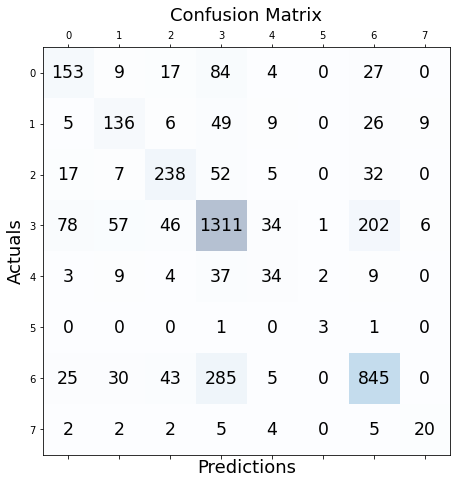



Classification Report
                      precision    recall  f1-score   support

             drought       0.54      0.52      0.53       294
          earthquake       0.54      0.57      0.56       240
extreme temperature        0.67      0.68      0.67       351
               flood       0.72      0.76      0.74      1735
           landslide       0.36      0.35      0.35        98
 mass movement (dry)       0.50      0.60      0.55         5
               storm       0.74      0.69      0.71      1233
   volcanic activity       0.57      0.50      0.53        40

            accuracy                           0.69      3996
           macro avg       0.58      0.58      0.58      3996
        weighted avg       0.69      0.69      0.69      3996



In [191]:
import math
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
clf = DecisionTreeClassifier().fit(x_train,y_train)
s = "{:.2f}".format(clf.score(x_train,y_train))
import numpy as nm
from sklearn.metrics import r2_score
np.random.seed(2)

x = nm.random.normal(3, 1, 100)
y = nm.random.normal(150, 40, 100) / x

train_x = x[:5000]
train_y = y[:5000]

test_x = x[75:]
test_y = y[75:]

mymodel = nm.poly1d(nm.polyfit(train_x, train_y, 15))
r1 = r2_score(train_y,mymodel(train_x))
r2 = r2_score(test_y, mymodel(test_x))

a = "{:.2f}".format(r1)
print('Accuracy on training set: ',a)
s = "{:.2f}".format(r2)
print("Accuracy on test set: ",s)
b = "{:.2f}".format((r1+r2)/2)
print("Average Accuracy: ",b)
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf.predict(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("\nConfusion Matrix\n")
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print("\n\nClassification Report")
print(classification_report(y_test,y_pred))

In [189]:
import pandas as pd
import plotly.express as px


fig = px.choropleth(file, locations="iso3",
                    color="disastertype",
                    hover_name="location",
                    animation_frame="year",
                    title = "Disasters in World and Prediction",color_continuous_scale=px.colors.sequential.PuRd)
 
 
fig["layout"].pop("updatemenus")
fig.show()

In [190]:
import pandas as pd
import plotly.express as px
import plotly.offline as po
import plotly.graph_objs as pg

df = pd.read_csv('/content/drive/MyDrive/ZERO_BUGS_VITHackathon/data1.csv')

data = dict(type='choropleth', 
            locations = df['iso3'], 
            z = df['year'], 
            text = df['country'])

layout = dict(title = 'Global GDP - orthographic projection', 
              geo = dict( projection = {'type':'orthographic'}, 
                       showlakes = True, 
                       lakecolor = 'rgb(0,191,255)'))

x = pg.Figure(data = [data], 
              layout = layout)
po.iplot(x)